# Import DataFrame and Prep Model

### Imports

In [0]:
#Arrays and Dataframe
import numpy as np
import pandas as pd

#SQL
from sqlalchemy import create_engine

#Visualization
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
import pylab

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format # can choose the number of decimal points to see

#Data Outliers
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import QuantileTransformer

#Data Normilization and Scaling
from scipy.stats import boxcox
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

#Data Exploration
from wordcloud import WordCloud #may have to do pip install wordcloud from terminal
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from scipy import stats
from scipy.stats import zscore
import math

#Feature Selection
from sklearn.decomposition import PCA
# from matplotlib.mlab import PCA as mlabPCA

#Data Modeling
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.svm import LinearSVC
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm #may need to run pip install statsmodels

#Model Metrics
from sklearn.utils.multiclass import unique_labels
import itertools
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.metrics import r2_score
from sklearn import metrics


#Testing model assumptions
from scipy.stats import bartlett
from scipy.stats import levene
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from statsmodels.tsa.stattools import acf

#Overfitting Linear Models
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

### Query and DataFrame Creation

In [0]:
#Make SQL Queary
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
id               1460 non-null int64
mssubclass       1460 non-null int64
mszoning         1460 non-null object
lotfrontage      1201 non-null float64
lotarea          1460 non-null int64
street           1460 non-null object
alley            91 non-null object
lotshape         1460 non-null object
landcontour      1460 non-null object
utilities        1460 non-null object
lotconfig        1460 non-null object
landslope        1460 non-null object
neighborhood     1460 non-null object
condition1       1460 non-null object
condition2       1460 non-null object
bldgtype         1460 non-null object
housestyle       1460 non-null object
overallqual      1460 non-null int64
overallcond      1460 non-null int64
yearbuilt        1460 non-null int64
yearremodadd     1460 non-null int64
roofstyle        1460 non-null object
roofmatl         1460 non-null object
exterior1st      1460 non-n

### Handle Missing Values

In [0]:
#Drop columns that have a large number of null values (over 30%) or are meaningless
df1 = df.drop(columns = ['alley', 'fireplacequ', 'poolqc', 'fence', 'miscfeature', 'id', 'lotshape', 'landcontour', 'lotconfig', 'condition1', 'condition2', 'roofstyle', 'roofmatl', 'heating', 'heatingqc', 'garagequal', 'paveddrive'])

In [0]:
#make a copy of df1
df2 = df1.copy()

#interpolate based on the year
year_list = list(df1['yearbuilt'].unique())
for year in year_list:
    df2.loc[df1['yearbuilt']==year] = df2.loc[df1['yearbuilt']==year].interpolate()

# drop missing values that are remaining
df2.dropna(inplace = True)

### Update Datatypes

In [0]:
#update data types
non_numeric = df2.select_dtypes(include = 'object')
numeric = df2.select_dtypes(include = ['float64', 'int64'])

### Analyize Numeric Features

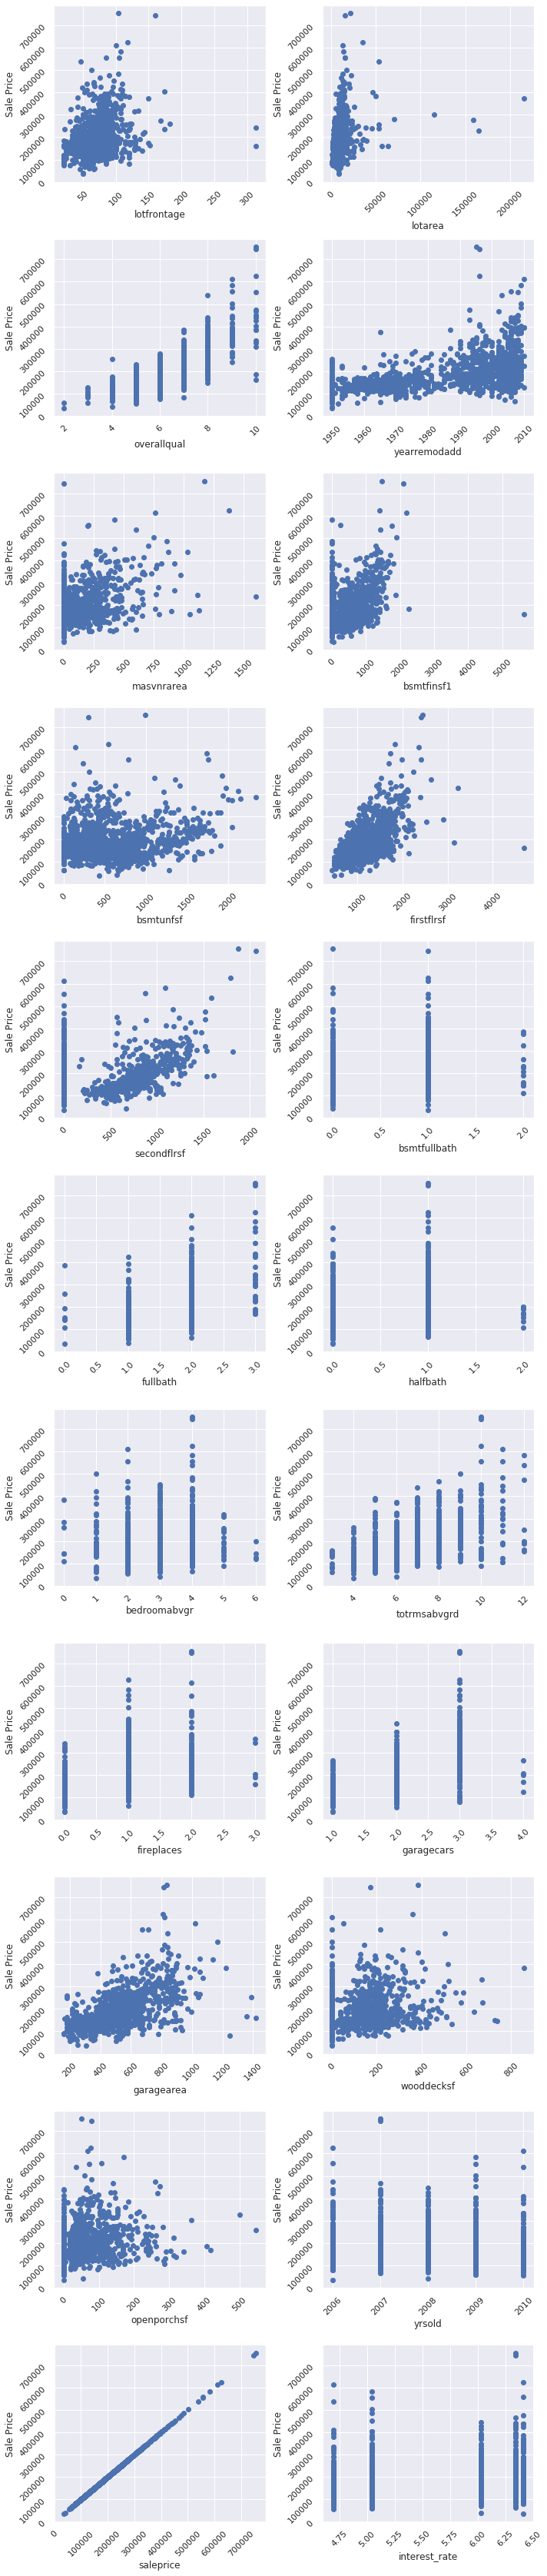

In [0]:
plt.figure(figsize = (10, 50))
i=1
for features in numeric1:
    plt.subplot(12,2,i)
    plt.scatter(numeric1[features], numeric1['saleprice'])
    plt.xticks(rotation = 45)
    plt.yticks(rotation = 45)
    plt.xlabel(features)
    plt.ylabel('Sale Price')
    plt.tight_layout()
    i+=1

plt.show()
    

In [0]:
numeric.corr()

,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,firstflrsf,secondflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garageyrblt,garagecars,garagearea,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
mssubclass,1.000,-0.358,-0.135,0.048,-0.096,0.055,0.037,0.031,-0.070,-0.075,-0.141,-0.263,-0.259,0.304,0.022,0.067,-0.010,0.001,0.116,0.197,-0.066,0.239,0.011,-0.026,0.079,0.001,-0.075,-0.010,-0.001,-0.022,-0.044,-0.024,0.010,-0.022,-0.020,-0.016,-0.083
lotfrontage,-0.358,1.000,0.309,0.211,-0.034,0.091,0.068,0.168,0.215,0.056,0.096,0.371,0.409,0.065,0.011,0.360,0.112,-0.013,0.160,0.031,0.245,0.009,0.322,0.228,0.053,0.253,0.322,0.070,0.123,0.016,0.062,0.033,0.183,0.007,0.020,0.005,0.321
lotarea,-0.135,0.309,1.000,0.090,0.002,-0.005,0.002,0.097,0.209,0.113,-0.014,0.267,0.289,0.049,0.009,0.257,0.161,0.046,0.116,0.007,0.123,-0.013,0.188,0.264,-0.026,0.138,0.168,0.171,0.085,-0.018,0.016,0.039,0.077,0.041,-0.002,-0.012,0.255
overallqual,0.048,0.211,0.090,1.000,-0.160,0.571,0.550,0.399,0.197,-0.081,0.294,0.508,0.482,0.277,-0.009,0.592,0.083,-0.064,0.578,0.248,0.079,-0.137,0.441,0.377,0.546,0.590,0.529,0.221,0.309,-0.120,0.027,0.047,0.064,-0.031,0.064,-0.015,0.784
overallcond,-0.096,-0.034,0.002,-0.160,1.000,-0.422,0.034,-0.139,-0.062,0.031,-0.159,-0.230,-0.144,0.017,0.042,-0.090,-0.075,0.124,-0.211,-0.070,0.026,-0.071,-0.059,-0.033,-0.340,-0.251,-0.205,-0.015,-0.058,0.075,0.026,0.054,-0.003,0.077,-0.011,0.051,-0.108
yearbuilt,0.055,0.091,-0.005,0.571,-0.422,1.000,0.617,0.300,0.225,-0.070,0.150,0.388,0.265,0.004,-0.160,0.189,0.176,-0.058,0.486,0.229,-0.083,-0.177,0.099,0.111,0.826,0.525,0.445,0.215,0.220,-0.389,0.030,-0.071,0.001,-0.034,0.004,-0.010,0.504
yearremodadd,0.037,0.068,0.002,0.550,0.034,0.617,1.000,0.168,0.101,-0.087,0.171,0.264,0.240,0.118,-0.051,0.274,0.101,-0.024,0.458,0.170,-0.083,-0.156,0.171,0.090,0.643,0.460,0.388,0.202,0.236,-0.217,0.042,-0.051,0.003,-0.001,0.017,0.031,0.501
masvnrarea,0.031,0.168,0.097,0.399,-0.139,0.300,0.168,1.000,0.253,-0.082,0.104,0.366,0.340,0.166,-0.060,0.389,0.076,0.017,0.270,0.191,0.107,-0.008,0.287,0.231,0.250,0.365,0.366,0.144,0.129,-0.118,0.017,0.055,0.009,-0.030,-0.011,-0.006,0.466
bsmtfinsf1,-0.070,0.215,0.209,0.197,-0.062,0.225,0.101,0.253,1.000,-0.061,-0.555,0.505,0.451,-0.152,-0.053,0.203,0.637,0.063,0.043,-0.024,-0.117,-0.036,0.049,0.242,0.145,0.196,0.282,0.188,0.108,-0.109,0.024,0.050,0.143,0.008,-0.023,0.022,0.360
bsmtfinsf2,-0.075,0.056,0.113,-0.081,0.031,-0.070,-0.087,-0.082,-0.061,1.000,-0.232,0.086,0.098,-0.106,0.011,-0.016,0.156,0.065,-0.085,-0.033,-0.011,-0.028,-0.040,0.036,-0.092,-0.072,-0.047,0.058,0.006,0.042,-0.031,0.090,0.042,0.007,-0.026,0.027,-0.028


In [0]:
#remove feature that have less than 15% correlation to target, or highly correlated with another feature (over 75%)
numeric1 = numeric.drop(columns = ['yearbuilt', 'enclosedporch', 'kitchenabvgr', 'overallcond', 'mosold', 'threessnporch', 'screenporch', 'poolarea', 'miscval', 'bsmthalfbath', 'lowqualfinsf', 'bsmtfinsf2', 'mssubclass', 'garageyrblt', 'totalbsmtsf', 'grlivarea'])


### Analyze Non_Numeric Features

ValueError: ignored

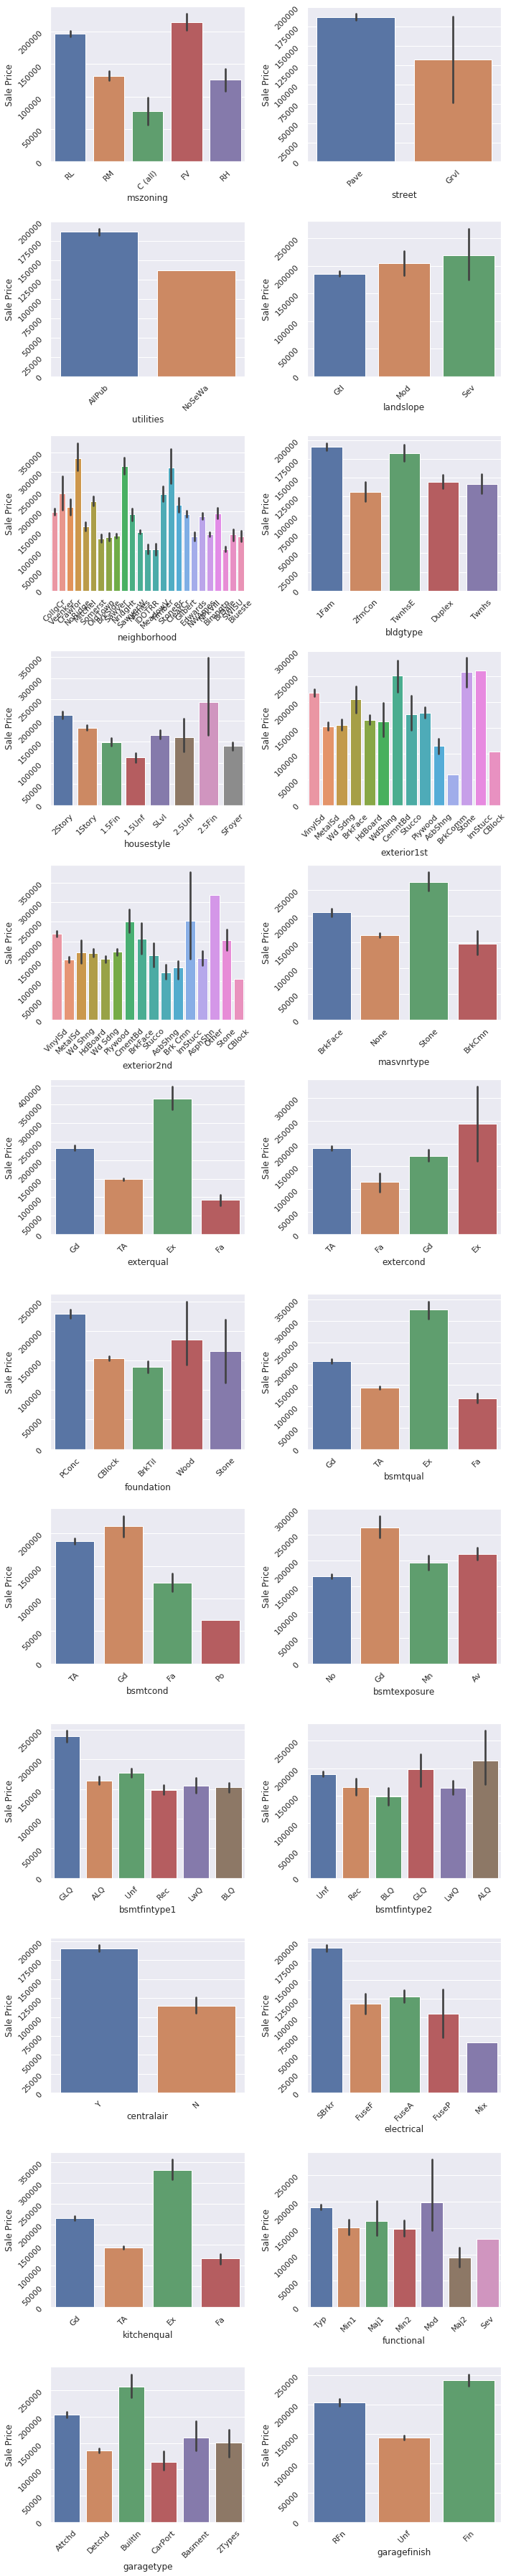

In [403]:
plt.figure(figsize = (10, 50))

for i in range(1, 24, 1):
    for features1 in non_numeric:
        plt.subplot(12,2,i)
        sns.barplot(non_numeric[features1], numeric1['saleprice'])
        plt.xticks(rotation = 45)
        plt.yticks(rotation = 45)
        plt.xlabel(features1)
        plt.ylabel('Sale Price')
        plt.tight_layout()
        i+=1

plt.show()
    

In [0]:
#remove feature that don't have much variance in regards to price
non_numeric1 = non_numeric.drop(columns = ['extercond', 'landslope', 'bsmtexposure', 'bsmtfintype1'])

### One Hot Encoding

In [0]:
#one hot endoding to non_numeric
non_numeric2 = pd.get_dummies(non_numeric1, drop_first = True)

In [0]:
#join back dataframes
df3 = pd.concat([numeric1, non_numeric2], axis = 1)

# Split Train Test Data

In [0]:
#Separate target variable from rest of data
X = df3.drop(columns = 'saleprice')
y = df3['saleprice']
X = sm.add_constant(X)

#split train_test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = .2)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


# Model 1

In [0]:
#Build linear regression model and fit to training data
lrm = linear_model.LinearRegression()
lrm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Evaluation Metrics

In [0]:
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test) 

print("R-squared of the model in the training set is: {}".format(lrm.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(lrm.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in the training set is: 0.8708466484157383
-----Test set statistics-----
R-squared of the model in the test set is: 0.828967658342521
Mean absolute error of the prediction is: 19781.596210907926
Mean squared error of the prediction is: 868491066.5999769
Root mean squared error of the prediction is: 29470.172490163284
Mean absolute percentage error of the prediction is: 11.615902519014806


## Test Model Assumptions for Model #1

#### Assumption one: linearity of the model in its coefficients should be a linear relationship in the visual

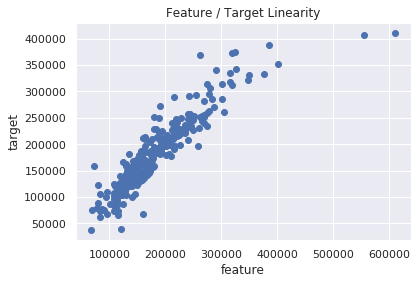

In [0]:
#should look linear 

plt.scatter(y_test, y_preds_test)
plt.xlabel("feature")
plt.ylabel("target")
plt.title('Feature / Target Linearity')
plt.show()

#### Assumption two: the error term should be zero on average

In [0]:

errors = y_test - y_preds_test

print("Mean of the errors in the house costs model is: {}".format(np.mean(errors)))

Mean of the errors in the house costs model is: 1156.8602919926582


#### Assumption three: homoscedasticity. Should be centered around zero. 

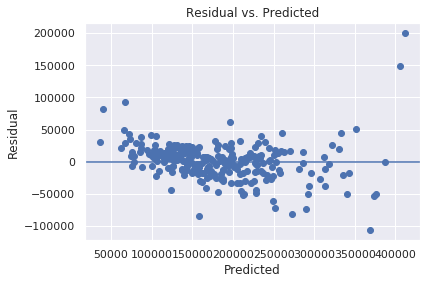

Bartlett test statistic value is 177.408 and p value is 1.78e-40
Levene test statistic value is 132.737 and p value is 1.53e-27


In [0]:
#should be centered around zero
plt.scatter(y_preds_test, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

#Bartlett and Levene tests: should be above .05
bart_stats = bartlett(y_preds_test, errors)
lev_stats = levene(y_preds_test, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

#### Assumption four: low multicollinearity. Each should be below 5. 

In [0]:
#VIF Method
vif = pd.Series([variance_inflation_factor(X.values, i) for i in range (X.shape[1])], index=X.columns)

with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
     print(vif)


/usr/local/lib/python3.6/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


const                   23231947.898
lotfrontage                    1.899
lotarea                        1.688
overallqual                    4.681
yearremodadd                   3.009
masvnrarea                     2.812
bsmtfinsf1                     9.154
bsmtunfsf                      8.749
firstflrsf                    10.353
secondflrsf                   14.314
bsmtfullbath                   2.226
fullbath                       3.803
halfbath                       2.889
bedroomabvgr                   3.062
totrmsabvgrd                   5.536
fireplaces                     1.842
garagecars                     5.039
garagearea                     4.935
wooddecksf                     1.348
openporchsf                    1.485
yrsold                        10.132
interest_rate                  9.973
mszoning_FV                   17.732
mszoning_RH                    3.617
mszoning_RL                   47.752
mszoning_RM                   31.727
street_Pave                    1.986
u

#### Assumption five: error terms should be uncorrelated with one another. 

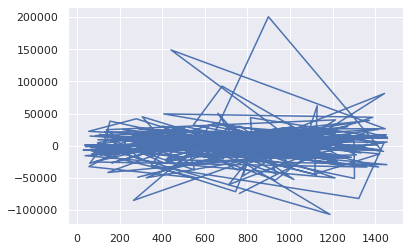

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


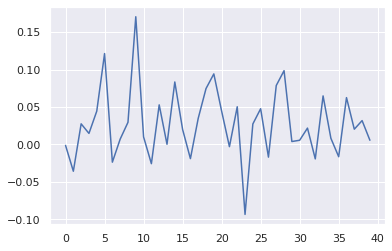

In [0]:
#Should be random and not a pattern.
plt.plot(errors)
plt.show()

#autocorrelation features. Should have low correlation. Not sure cutoff? -.06 to .06 is good
acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

#### Assumption six: features shouldn't be correlated with the errors. Pvalue should be above .05

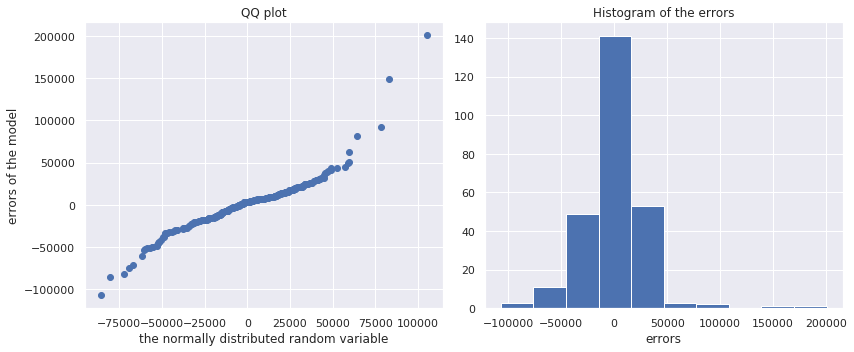

Jarque-Bera test statistics is 1228.4907203223447 and p value is 0.0
Normality test statistics is 103.9923724833913 and p value is 2.620253050232823e-23


In [0]:
rand_nums = np.random.normal(np.mean(errors), np.std(errors), len(errors))

plt.figure(figsize=(12,5))

#we want a straight-ish line
plt.subplot(1,2,1)
plt.scatter(np.sort(rand_nums), np.sort(errors)) # we sort the arrays
plt.xlabel("the normally distributed random variable")
plt.ylabel("errors of the model")
plt.title("QQ plot")

#we want it to look normalish
plt.subplot(1,2,2)
plt.hist(errors)
plt.xlabel("errors")
plt.title("Histogram of the errors")

plt.tight_layout()
plt.show()

#we want low test statistic, high pvalue
jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

# Model 2

## Ridge Regression

In [0]:

# Fitting a ridge regression model. Alpha is the regularization
# parameter (usually called lambda). As alpha gets larger, parameter
# shrinkage grows more pronounced.
ridgeregr = Ridge(alpha=5)  
ridgeregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = ridgeregr.predict(X_train)
y_preds_test = ridgeregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format(ridgeregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(ridgeregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))


R-squared of the model on the training set is: 0.8640447001274214
-----Test set statistics-----
R-squared of the model on the test set is: 0.8655001768821032
Mean absolute error of the prediction is: 17136.426170768365
Mean squared error of the prediction is: 682981322.1589732
Root mean squared error of the prediction is: 26133.911344438537
Mean absolute percentage error of the prediction is: 9.820795361351923


In [0]:
#Find ideal hyperparametersfrom sklearn.linear_model import RidgeCV
alphas = [4.65, 5, 5.5]
rcv = RidgeCV(alphas = alphas) 
rcv.fit(X_train, y_train)
print(rcv.alpha_)

5.0


## Lasso Regression

In [0]:
lassoregr = Lasso(alpha=5.2) 
lassoregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lassoregr.predict(X_train)
y_preds_test = lassoregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format(lassoregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(lassoregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))


R-squared of the model on the training set is: 0.8704783035080137
-----Test set statistics-----
R-squared of the model on the test set is: 0.8384114528625122
Mean absolute error of the prediction is: 19036.008531428815
Mean squared error of the prediction is: 820536094.4822253
Root mean squared error of the prediction is: 28645.001212815914
Mean absolute percentage error of the prediction is: 11.067497788009522


In [0]:
#Find ideal hyperparameters

from sklearn.linear_model import LassoCV
alphas = [5.1, 5.2,  5.3, 5.4, 10, 100, 1000, 10000]
lcv = RidgeCV(alphas = alphas) 
lcv.fit(X_train2, y_train2)
print(lcv.alpha_)

5.1


## Elastic Net

In [0]:
elasticregr = ElasticNet(alpha=.7, l1_ratio=.99, max_iter = 168) 
elasticregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = elasticregr.predict(X_train)
y_preds_test = elasticregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format(elasticregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(elasticregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))


R-squared of the model on the training set is: 0.8614027765158581
-----Test set statistics-----
R-squared of the model on the test set is: 0.8668259243383625
Mean absolute error of the prediction is: 17122.84052516318
Mean squared error of the prediction is: 676249263.1158091
Root mean squared error of the prediction is: 26004.793079657626
Mean absolute percentage error of the prediction is: 9.845175644700896


In [0]:
#Find ideal hyperparameters
from sklearn.linear_model import ElasticNetCV
ratios = [.95, .99]
alphas = [.6, .7, .8, 1, 2, 10]
ecv = ElasticNetCV(l1_ratio=ratios, n_jobs=-1, alphas = alphas) 

ecv.fit(X_train, y_train)

print(ecv.l1_ratio_)
print(ecv.alpha_)
print(ecv.n_iter_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.99
0.7
168


# Ridge Regression Continued
Ridge Regression gave the best results

### Apply quantile transformer and then rerun data

In [0]:
scale = QuantileTransformer(output_distribution='normal')

X_train_scale = scale.fit_transform(X_train)
X_train_scale = pd.DataFrame(X_train_scale, columns=X_train.columns)

X_test_scale = scale.transform(X_test)
X_test_scale = pd.DataFrame(X_test_scale, columns=X_test.columns)


In [0]:
# results.summary()
lrm = linear_model.LinearRegression()
lrm.fit(X_train_scale, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_preds_train = lrm.predict(X_train_scale)
y_preds_test = lrm.predict(X_test_scale) 

print("R-squared of the model in the training set is: {}".format(lrm.score(X_train_scale, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(lrm.score(X_test_scale, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in the training set is: 0.8706744127704007
-----Test set statistics-----
R-squared of the model in the test set is: -5.205868604142682e+24
Mean absolute error of the prediction is: 1.3425313849235902e+16
Mean squared error of the prediction is: 2.6435060952657546e+34
Root mean squared error of the prediction is: 1.6258862491778922e+17
Mean absolute percentage error of the prediction is: 15066576440113.277


### Check for Outliers and Normality on each numeric feature

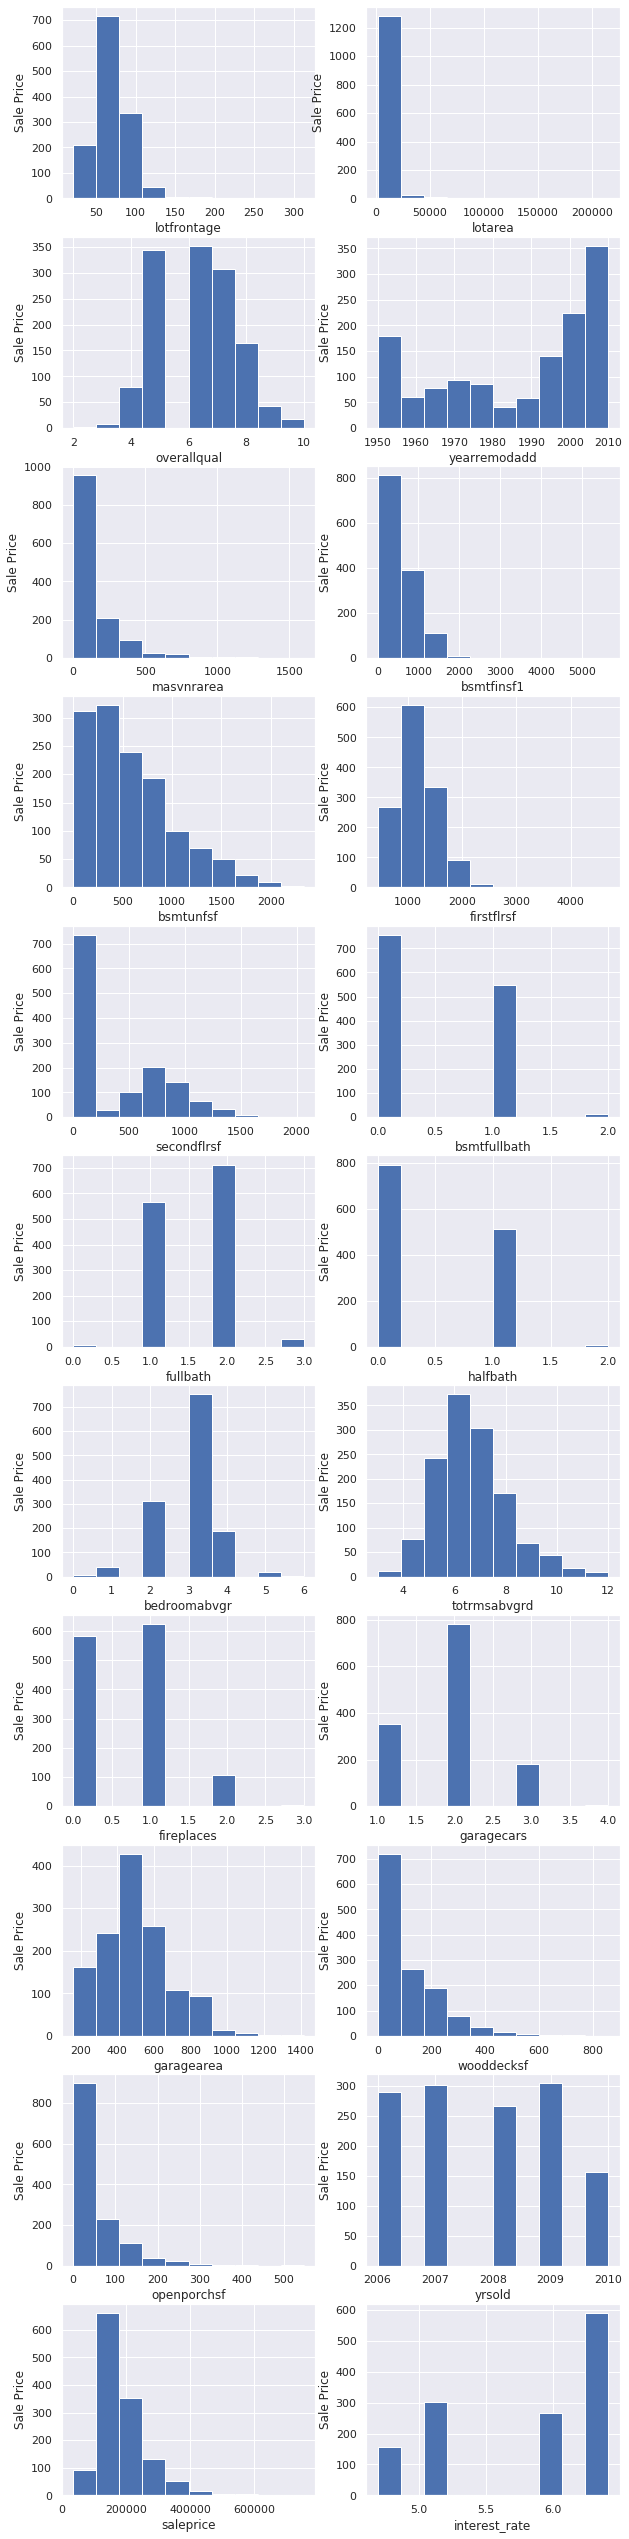

In [398]:
plt.figure(figsize = (10, 50))

i=1
for column in list(numeric1.columns):
    plt.subplot(12,2,i)
    plt.hist(numeric1[column])
    plt.xlabel(column)
    plt.ylabel('Sale Price')
    i+=1

plt.show()

### Add Interest Rate Feature

In [0]:
df4 = df3.copy()
#add in interest rate feature
int_rates = {2006: 6.41, 2007: 6.34, 2008: 6.03, 2009: 5.04, 2010: 4.69}


df4['interest_rate'] = df4['yrsold'].map(int_rates)

In [399]:
X5 = df4.drop(columns = 'saleprice')
y5 = df4['saleprice']
X5 = sm.add_constant(X)

X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, random_state = 42, test_size = .2)

# Fitting a ridge regression model. 
ridgeregr = Ridge(alpha=5)  
ridgeregr.fit(X_train1, y_train1)

# Make predictions
y_preds_train5 = ridgeregr.predict(X_train5)
y_preds_test5 = ridgeregr.predict(X_test5)

print("R-squared of the model on the training set is: {}".format(ridgeregr.score(X_train5, y_train5)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(ridgeregr.score(X_test5, y_test5)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test5, y_preds_test5)))
print("Mean squared error of the prediction is: {}".format(mse(y_test1, y_preds_test5)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test1, y_preds_test5)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test5 - y_preds_test5) / y_test5)) * 100))

R-squared of the model on the training set is: 0.8640447001274214
-----Test set statistics-----
R-squared of the model on the test set is: 0.8655001768821032
Mean absolute error of the prediction is: 17136.426170768365
Mean squared error of the prediction is: 682981322.1589732
Root mean squared error of the prediction is: 26133.911344438537
Mean absolute percentage error of the prediction is: 9.820795361351923


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [0]:
#Find ideal hyperparametersfrom sklearn.linear_model import RidgeCV
alphas = [4.65, 5, 5.5]
rcv = RidgeCV(alphas = alphas) 
rcv.fit(X_train5, y_train5)
print(rcv.alpha_)

5.0


In [406]:
df4['yrsold'].corr(df4['interest_rate'])

-0.9422162837135003

# **Conclusion** 

The Ridge Regression was the best performing model with an r-squared of 86.6% on the test data. 

Adding in the interest rate feature did not improve the model. Because this feature is directly correlated to the yrsold, it does not add any additional value to the model. 

A helpful feature would have been to also include the time of year sold as home sales are generally different during spring and summer months than fall and winter. 

**Future Iterations**

On future iterations of this model, I would spend time going through each feature and seeing if transformations, outlier limiting, etc. could improve the model. 